# Project 2: Investigate a Dataset

## Lahman Baseball Database

## Data Wrangling and Exploration

Since the publication of Michael Lewis's *Moneyball* in 2003, there has been an explosion of interest in the field of sabermetrics. Sabermetrics involves the application of statistical analysis on baseball data to identify players with high-performance potential who may have otherwise gone unnoticed, thus will not command a salary as high as that of more well-known names.

**Data Source:** [Lahman Baseball Database](http://www.seanlahman.com/baseball-archive/statistics/) is a comprehensive record of batting and pitching statistics from 1871 to 2016. It also contains fielding statistics, standings, team stats, managerial records, post-season data, and some other data points.

 Taking inspiration from Moneyball, this study aims to mine the relationship between various player statistics, salaries, and team performance. This report is divided into the following sections.

1. Analysing Performance Metrics 
2. Offence vs. Defence for Match-Winning
3. Pitcher Salary

### Section 1: Analysing Performance Metrics

**What is the relationship between On-Base Percentage (OBP), Slugging Percentage (SLG), Walks plus Hits per Innings Pitched (WHIP), Payroll and Team Performance?**

The response variable, *team performance* is measured as the percentage of games won per season. 
The explanatory variables of choice are OBP, SLG, WHIP, and Payroll. 

A chosen model for this statistical problem is Linear Regression (which has been summarized below).

If there are $k$ explanatory variables, the regression equation model is $y = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + ... + \beta_{k}x_{k} + \epsilon.$

The $x_{1}, x_{2}, ..., x_{k}$ represent the $k$ explanatory variables. $\beta_{0}$ is the y-intercept, or constant, $\beta_{1}$ is the coefficient on the first explanatory variable, $\beta_{2}$ is the coefficient on the second explanatory variable, and so on. $\epsilon$ is the error term or the residual that can't be explained by the model.

Based on the above, four null hypotheses are formulated, each stating that the coefficient of the respective variable equals zero, i.e., this explanatory variable does not have an impact on the response variable, *Winning Percentage*. 

$H_{0}$ : $\beta_{OBP}= 0$ 

$H_{0}$ : $\beta_{SLG}= 0$ 

$H_{0}$ : $\beta_{WHIP}= 0$ 

$H_{0}$ : $\beta_{Payroll}= 0$ 

The alternative hypotheses then are:

$H_{a}$ : $\beta_{OBP}\neq 0$ 

$H_{a}$ : $\beta_{SLG}\neq 0$ 

$H_{a}$ : $\beta_{WHIP}\neq 0$ 

$H_{a}$ : $\beta_{Payroll}\neq 0$ 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.seterr(invalid='ignore');

In [5]:
# Function to load CSVs
def load(data_file):
    """This function loads the CSVs as a dataframe.
    The CSVs should be stored in a folder named 'data'.
    """
    return pd.read_csv('data/' + data_file)

In [6]:
# Creating a master DataFrame
master = load('Teams.csv')

# Subsetting - Salary data is only available after 1985
master = master[master['yearID'] >= 1985]

# Adding winning_percentage to DF
master['winning_percentage'] = (master['W']/master['G']) * 100

# Resetting the index to integer index
master = master.reset_index(drop=True)

**On-Base Percentage:** On-Base Percentage (OBP) measures the how much a player can make a not-out. Players with high on-base percentages tend to reach base at a high rate, prolonging games and giving their team more opportunities to score.

Source: [fangraphs.com](https://fangraphs.com)

In [5]:
master['OBP'] = (master['H'] + master['BB'] + master['HBP']) \
                /(master['AB'] + master['BB'] + master['HBP'] + master['SF'])

master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 50 columns):
yearID                918 non-null int64
lgID                  918 non-null object
teamID                918 non-null object
franchID              918 non-null object
divID                 918 non-null object
Rank                  918 non-null int64
G                     918 non-null int64
Ghome                 918 non-null float64
W                     918 non-null int64
L                     918 non-null int64
DivWin                890 non-null object
WCWin                 654 non-null object
LgWin                 890 non-null object
WSWin                 890 non-null object
R                     918 non-null int64
AB                    918 non-null int64
H                     918 non-null int64
2B                    918 non-null int64
3B                    918 non-null int64
HR                    918 non-null int64
BB                    918 non-null int64
SO                    91

By looking at *master_df.info()*, it can be noted that there are only 510 values for *HBP* and *SF*, and thus for *OBP* too. 

This can be explained via the following.

In [6]:
HBP_SF_missing = master[(master['HBP'].isnull()) | \
                           (master['SF'].isnull())]['yearID']
print("Number of missing values: " + str(HBP_SF_missing.size))
print(set(HBP_SF_missing))

Numver of missing values: 408
{1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999}


From 1985 to 1992, MLB had 26 teams.  
From 1993 to 1997, 28 teams.  
From 1998, 30 teams.  

Hence, 8*26 + 5*28 + 2*30 = 408 missing values.
This logic exactly matches the number of missing values.

*Batting.csv* consists of individual batting statistics. These can be used to fill-in the missing values.

In [7]:
batting = load('Batting.csv')

# Values for 1985 to 1999
batting = batting[(batting['yearID'] >=1985) & (batting['yearID'] < 2000)]

# Group by team and year
batting_totals = batting.groupby(['teamID', 'yearID']).sum()
#print(len(batting_totals))

# Calculate On-Base Percentage
batting_totals['OBP'] = (batting_totals['H'] + batting_totals['BB'] + batting_totals['HBP'])\
                        /(batting_totals['AB'] + batting_totals['BB'] + batting_totals['HBP'] + batting_totals['SF'])

# Reshaping the DataFrame
batting_totals.drop(['G', 'stint'], 1, inplace=True)
batting_totals = batting_totals.reset_index()
batting_totals.sort_values(['yearID', 'teamID'], inplace=True)
batting_totals = batting_totals.reset_index(drop=True)

# Merge the DataFrame
master = master.combine_first(batting_totals)
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 54 columns):
2B                    918 non-null int64
3B                    918 non-null int64
AB                    918 non-null int64
BB                    918 non-null int64
BBA                   918 non-null int64
BPF                   918 non-null int64
CG                    918 non-null int64
CS                    918 non-null float64
DP                    918 non-null float64
DivWin                890 non-null object
E                     918 non-null int64
ER                    918 non-null int64
ERA                   918 non-null float64
FP                    918 non-null float64
G                     918 non-null int64
GIDP                  408 non-null float64
Ghome                 918 non-null float64
H                     918 non-null int64
HA                    918 non-null int64
HBP                   918 non-null float64
HR                    918 non-null int64
HRA                

There are still missing values for some of the attributes. Although, it is not necessary to work them out as they are not required for this analysis. Hence, *master* DataFrame can be left as it is.

**Slugging Percentage:** Slugging Percentage (SLG) represents the total number of bases a players records per at-bat. 

Unlike on-base percentage, slugging percentage deals only with hits and does not include walks and hit-by-pitches in its equation. Slugging percentage exists mainly as a response to a noticeable flaw in batting average: *not all hits are created equal*. In batting average, a single and a home run are valued the same. Slugging percenage counts home-runs four times as much as a single. 

Source: [mlb.com](https://mlb.com)

In [8]:
# Calculating and adding SLG to master DataFrame
master['SLG'] = (master['H'] + master['2B'] + 2*master['3B'] + 3*master['HR'])\
                /(master['AB'])

**WHIP:** WHIP is one of the most commonly used statistic for evaluating a pitcher's performance. The statistics shows how well a pitcher has kept runners off the basepaths, one his main goals.

The formula is described as: the sum of pitcher's walks and hits, divided by his totals innings pitched. 

Source: [mlb.com](https://mlb.com)

In [9]:
# Calcuating and adding WHIP to master DataFrame
master['WHIP'] = (master['BBA'] + master['HA'])/(master['IPouts']/3)
# Innings Pitched = IPouts (Innings Pitched Outs)/3
master.head()

,2B,3B,AB,BB,BBA,BPF,CG,CS,DP,DivWin,...,name,park,teamID,teamIDBR,teamIDlahman45,teamIDretro,winning_percentage,yearID,SLG,WHIP
0,213,28,5526,553,642,105,9,52.0,197.0,N,...,Atlanta Braves,Atlanta-Fulton County Stadium,ATL,ATL,ATL,ATL,40.740741,1985,0.363011,1.478380
1,234,22,5517,604,568,97,32,43.0,168.0,N,...,Baltimore Orioles,Memorial Stadium,BAL,BAL,BAL,BAL,51.552795,1985,0.429763,1.435179
2,292,31,5720,562,540,104,35,27.0,161.0,N,...,Boston Red Sox,Fenway Park II,BOS,BOS,BOS,BOS,49.693252,1985,0.429196,1.387406
3,215,31,5442,648,514,100,22,51.0,202.0,N,...,California Angels,Anaheim Stadium,CAL,CAL,CAL,CAL,55.555556,1985,0.385888,1.350034
4,247,37,5470,471,569,104,20,56.0,152.0,N,...,Chicago White Sox,Comiskey Park,CHA,CHW,CHA,CHA,52.147239,1985,0.392139,1.364576


**Payroll:** These statistics are related to player salaries from the year 1985 onwards. 

In [10]:
# Salaries.csv contains individual salary data from 1985
salaries = load('Salaries.csv')
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26428 entries, 0 to 26427
Data columns (total 5 columns):
yearID      26428 non-null int64
teamID      26428 non-null object
lgID        26428 non-null object
playerID    26428 non-null object
salary      26428 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


In [11]:
# Get payroll of each team
# Sum up the individual salaries for each season
payroll = salaries.groupby(['teamID', 'yearID']).sum()
payroll.head(10)

salary
teamID yearID           
ANA    1997     31135472
       1998     41281000
       1999     55388166
       2000     51464167
       2001     47535167
       2002     61721667
       2003     79031667
       2004    100534667
ARI    1998     32347000
       1999     68703999

In [12]:
# Join the obtained DF with master DF
master = master.join(payroll, on=['teamID', 'yearID'])

Winning games with a payroll of a million dollars had a very different significance in 1985 than in 2017. To get comparable data, the data has been normalized using the approach: http://stats.stackexchange.com/questions/70801/how-to-normalize-data-to-0-1-range

An alternative approach is to use [preprocessing scaling](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) via sk-learn. Although, it hasn't been implemented.

In [13]:
# Renaming salary column
master.rename(columns={'salary':'payroll'}, inplace=True)

# Adding normalized payroll to master DF
master['norm_payroll'] = pd.Series()
grouped = master.groupby('yearID')
for name, group in grouped:
    master['norm_payroll'].update((group['payroll'] - group['payroll'].min())\
                                     /(group['payroll'].max() - group['payroll'].min()))

In [14]:
# Correlation Plots
def corr_plot(xv, yv, title):
    runs_wins_plot = sns.regplot(x=xv, y=yv, scatter_kws={'alpha':0.25})
    runs_wins_plot.set_title(title, fontsize=13)
    plt.show()
    print("Pearson's Correlation Coefficient (r) = " + str(xv.corr(yv)))
    print('\n')

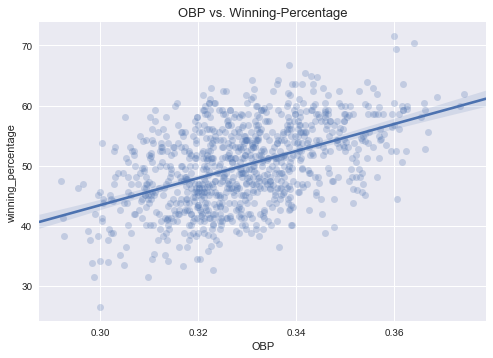

Pearson's Correlation Coefficient (r) = 0.475914312431




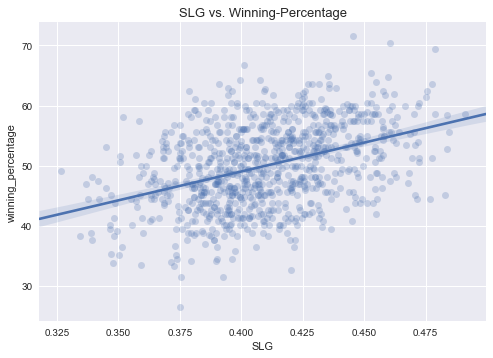

Pearson's Correlation Coefficient (r) = 0.403894886852




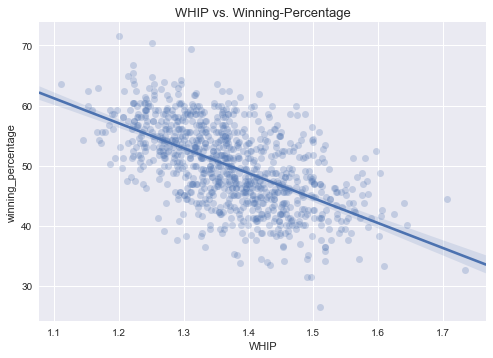

Pearson's Correlation Coefficient (r) = -0.574334368196




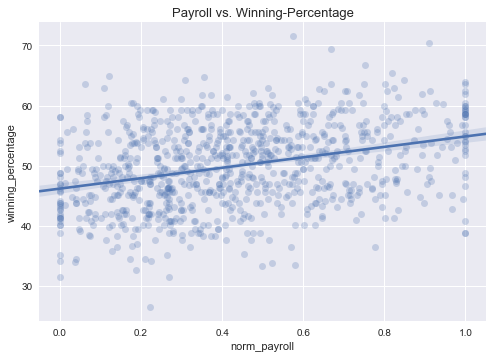

Pearson's Correlation Coefficient (r) = 0.330886122355




In [15]:
# Plots as desribed below
corr_plot(master['OBP'], master['winning_percentage'], 'OBP vs. Winning-Percentage')
corr_plot(master['SLG'], master['winning_percentage'], 'SLG vs. Winning-Percentage')
corr_plot(master['WHIP'], master['winning_percentage'], 'WHIP vs. Winning-Percentage')
corr_plot(master['norm_payroll'], master['winning_percentage'], 'Payroll vs. Winning-Percentage')

**OBP and SLG are positively correlated with winning percentage. The strength of the correlation is decent. WHIP is negatively correlated with a high strength of association.** These meet the intuitive expectations.

**Payroll is mildly associated with winning games.** This inference might be counter-intuitive (or intuitive, if familiar with the ideology of Moneyball). However, money has always been a significant factor in team building. Hence, further examination has been done for this variable.

In [16]:
# A Ordinary Least Squares (OLS) regression is applied.
# All variables are included in the regression model.

import statsmodels.api as sm
import statsmodels.formula.api as smf

result = smf.ols(formula='winning_percentage ~ OBP + SLG + WHIP + norm_payroll',\
                data=master).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     winning_percentage   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     787.1
Date:                Tue, 06 Jun 2017   Prob (F-statistic):          2.29e-292
Time:                        22:54:52   Log-Likelihood:                -2353.4
No. Observations:                 907   AIC:                             4717.
Df Residuals:                     902   BIC:                             4741.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       29.0634      2.749     10.571   

There's more to multiple regression (e.g., verification of the fit by checking the residual plots) that could've been performed. As the statistical analysis is not the key aspect of this exercise, it has been kept minimal.

The p-value for each variable tests the null hypothesis that the coefficient is equal to zero (the variable does not affect the response variable). **A low p-value (< 0.05) indicates that the null hypothesis can be rejected.**

Hence, all explanatory variables are meaningful additions to the model - all their p-values are 0.000. Even at $\alpha$ = 0.01 level of significance, the null hypothesis for each explanatory variable can be rejected.

*An r-squared value of 0.779 indicates that our model explains 78% of the variability of the response data.* It does a decent job of explaining wins.

### Section 2: Strategic Factors for Winning Games

1. How to the number of strike-outs correlate with the number of games won?
3. Defense vs. Offense for winning games.

In [17]:
# Helper functions
def corrected_standard_error(x):
    return (x-x.mean())/x.std(ddof=0)

def correlation(x, y):
    std_x = corrected_standard_error(x)
    std_y = corrected_standard_error(y)
    return (std_x*std_y).mean()

def add_win_percentage_to_df(df):
    """Calculate win-%age & add attribute to data frame.
    """
    df['winPercent'] = df['W']/(df['W'] + df['L'])

*Teams.csv* contains team level statistics. This dataset will be useful in answering the questions about the correlation between losses and errors. In addition, winning statistics can be combined with *Salaries.csv* dataset to be able to answer the objective questions.

*Salaries.csv* shows the player's salary, year and the team they were associated with. This data however is available only from the year 1985 onwards. Therefore, data prior to 1985 has been ignored.

In [18]:
teams = load('Teams.csv')
add_win_percentage_to_df(teams)
win_percent = teams[['yearID', 'teamID', 'winPercent']]
win_percent.describe()

,yearID,winPercent
count,2835.000000,2835.000000
mean,1955.681834,0.498295
std,41.767356,0.095128
min,1871.000000,0.000000
25%,1920.000000,0.440969
50%,1964.000000,0.506024
75%,1993.000000,0.561728
max,2016.000000,0.898734


The *Teams.csv* file has a number of fields that are empty for strike-outs, or set to 0. Those rows have been excluded for this part of the analysis.

In [19]:
teams_with_strikeouts_recorded = teams[teams['SO'] > 0]

strikeouts = teams_with_strikeouts_recorded['SO']
win_percent = teams_with_strikeouts_recorded['winPercent']

print (correlation(win_percent, strikeouts))

-0.021926633465456143


**Strike-outs do not appear to have a correlation with wins.** *This is contrary to the intuitive judgement mentioned earlier* i.e. teams with more strikeouts are hitting the ball less on average which in turn would result in less runs being scored further resulting in less overall wins. However, this does not appear to be the case.

Source: https://en.wikipedia.org/wiki/Strikeout

The correlation coefficient is negative and at the same time is very close to zero, hence nothing conclusive can be said.

In [20]:
win_percent = teams['winPercent']
runs = teams['R']
earned_runs_allowed = teams['ER']

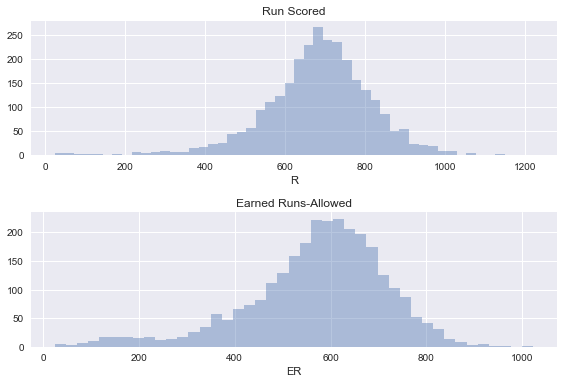

In [21]:
# Distribution of metrics
fig, ((ax1, ax2)) = plt.subplots(nrows=2)
sns.distplot(runs, ax=ax1, kde=False)
sns.distplot(earned_runs_allowed, ax=ax2, kde=False)
ax1.set_title('Run Scored')
ax2.set_title('Earned Runs-Allowed')
plt.tight_layout()
plt.show()

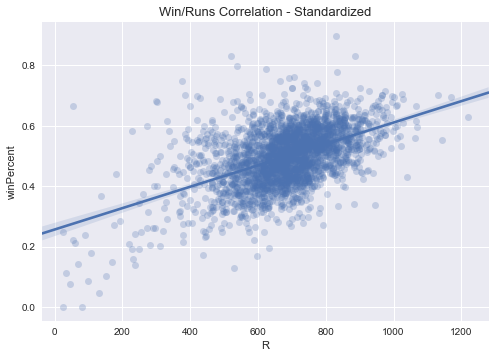

Pearson's Correlation Coefficient (r) = 0.503545174259




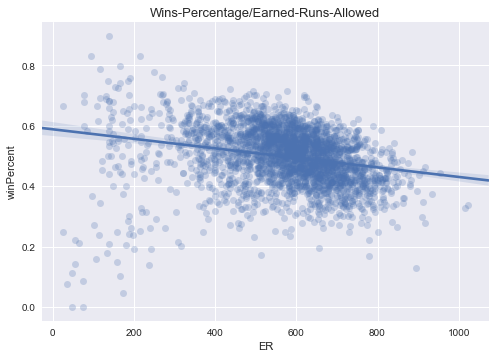

Pearson's Correlation Coefficient (r) = -0.243468490439




In [22]:
corr_plot(runs, win_percent, 'Win/Runs Correlation - Standardized')
corr_plot(earned_runs_allowed, win_percent, 'Wins-Percentage/Earned-Runs-Allowed')

**The correlation between the win-percentage to the runs scored is a moderate correlation in the positive direction. Also, the correlation between win-percentage and to earned-runs is a weak negative correlation.**

Overall, **it appears that if teams focus on offense, i.e., to score more runs, it is more likely for them to win more games.** There is a caveat to this analysis though. These findings are very preliminary incorporating of only correlation measures. Multiple factors and variables are likely to cause changes to the results.

### Section 3: Pitcher's Salary

The prior sections emphasized primarily on batting statistics. Hence, **this section aims to compensate for pitcher related statistics to determine which statistics determine a pitcher's salary.** For this, correlation tests are done with Salary as a response variable and other pitching records as independent variables. 

In [23]:
salary = load('Salaries.csv')
pitching_record = load('Pitching.csv')

In [24]:
salary.describe()

,yearID,salary
count,26428.000000,2.642800e+04
mean,2000.878727,2.085634e+06
std,8.909314,3.455348e+06
min,1985.000000,0.000000e+00
25%,1994.000000,2.947020e+05
50%,2001.000000,5.500000e+05
75%,2009.000000,2.350000e+06
max,2016.000000,3.300000e+07


In [25]:
pitching_record.describe()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,...,30388.000000,44830.000000,44405.000000,44963.000000,44724.000000,44830.000000,44963.000000,12063.000000,12063.000000,12061.000000
mean,1968.670062,1.079643,4.715744,4.715722,23.681761,9.485488,3.151035,0.448591,1.504793,253.872139,...,2.411379,2.528575,2.266096,0.301604,343.312181,6.345260,43.021773,2.141922,1.878388,5.322610
std,37.569499,0.284834,5.813410,4.988846,18.493488,12.283920,7.081844,1.109742,4.991518,257.330446,...,2.772648,3.425706,2.998881,0.755523,348.758261,9.993949,43.245812,2.710191,2.121352,5.990178
min,1871.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1941.000000,1.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,49.000000,...,0.000000,0.000000,0.000000,0.000000,64.000000,0.000000,11.000000,0.000000,0.000000,1.000000
50%,1978.000000,1.000000,2.000000,3.000000,21.000000,3.000000,0.000000,0.000000,0.000000,167.000000,...,2.000000,1.000000,1.000000,0.000000,227.000000,3.000000,28.000000,1.000000,1.000000,3.000000
75%,2001.000000,1.000000,7.000000,8.000000,35.000000,17.000000,3.000000,0.000000,1.000000,393.000000,...,4.000000,4.000000,3.000000,0.000000,535.000000,8.000000,67.000000,3.000000,3.000000,8.000000
max,2016.000000,4.000000,59.000000,48.000000,106.000000,75.000000,75.000000,16.000000,62.000000,2040.000000,...,23.000000,63.000000,41.000000,16.000000,2906.000000,84.000000,519.000000,21.000000,14.000000,40.000000


The 'yearID' in *salary* DataFrame ranged from 1985, while 'yearID' in *pitching_record* is available from 1871. Hence, when inner merging, a lot of data for pitching prior to 1985 gets removed, which is acceptable as there are still enough observations to conduct the analysis.

In [26]:
pitchers = salary.merge(pitching_record, \
                        on = ['playerID', 'yearID', 'teamID', 'lgID'], how = 'inner')

In [27]:
# Displays all attributes with .describe()
from IPython.display import display
with pd.option_context('display.max_columns', None):
    display(pitchers.describe())

,yearID,salary,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,11797.000000,1.179700e+04,11797.000000,11797.000000,11797.000000,11797.00000,11797.000000,11797.000000,11797.000000,11797.000000,11797.000000,11797.000000,11797.000000,11797.000000,11797.000000,11797.000000,11336.000000,11792.000000,11797.000000,11797.000000,11797.000000,11797.000000,11797.000000,11797.000000,11797.000000,6481.000000,6481.000000,6481.000000
mean,2001.159278,1.897872e+06,1.008816,5.153937,4.995762,33.90540,10.269899,0.673646,0.215818,2.851403,268.243282,88.835043,40.862846,9.665169,32.131389,65.569213,0.251194,4.743864,2.619819,3.135882,2.951598,0.468763,383.041027,9.187929,44.712130,3.039654,2.577689,7.466286
std,8.778015,3.119543e+06,0.102148,4.908647,4.094051,20.44062,12.783021,1.724879,0.642570,8.185159,203.171190,67.193137,30.611622,8.094901,23.133674,52.570891,0.076771,3.557083,2.514453,3.063076,2.994759,1.001768,283.946959,13.847448,33.404884,3.104378,2.353063,6.743777
min,1985.000000,6.000000e+04,1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1994.000000,2.800000e+05,1.000000,1.000000,2.000000,19.00000,0.000000,0.000000,0.000000,0.000000,113.000000,37.000000,17.000000,3.000000,15.000000,26.000000,0.230000,3.320000,1.000000,1.000000,1.000000,0.000000,167.000000,0.000000,19.000000,1.000000,1.000000,2.000000
50%,2001.000000,5.275000e+05,1.000000,4.000000,4.000000,32.00000,1.000000,0.000000,0.000000,0.000000,207.000000,66.000000,30.000000,7.000000,27.000000,53.000000,0.257000,4.200000,2.000000,2.000000,2.000000,0.000000,294.000000,3.000000,33.000000,2.000000,2.000000,5.000000
75%,2009.000000,2.200000e+06,1.000000,8.000000,8.000000,48.00000,22.000000,0.000000,0.000000,1.000000,410.000000,141.000000,65.000000,15.000000,46.000000,92.000000,0.282000,5.310000,4.000000,5.000000,4.000000,1.000000,594.000000,13.000000,71.000000,4.000000,4.000000,11.000000
max,2016.000000,3.257100e+07,4.000000,27.000000,21.000000,94.00000,39.000000,20.000000,10.000000,62.000000,845.000000,284.000000,145.000000,50.000000,152.000000,372.000000,1.000000,108.000000,18.000000,26.000000,21.000000,16.000000,1157.000000,79.000000,160.000000,21.000000,14.000000,40.000000


The counts of *GIDP*, *SH*, *SF* only amounts to 6481, which is low if compared to the data available for other columns with 11797 observations. This is most likely to be because of unavailability of data for a certain time period.

In [28]:
pitchers.groupby('GIDP')['yearID']
print(pitchers.groupby('SH').agg({'yearID':'min'}).min())
print(pitchers.groupby('SF').agg({'yearID':'min'}).min())
print(pitchers.groupby('GIDP').agg({'yearID':'min'}).min())

yearID    2000
dtype: int64
yearID    2000
dtype: int64
yearID    2000
dtype: int64


Thus, all data is available only after the year 2000. For this analysis, these columns are removed from the DataFrame.

In [29]:
pitchers = pitchers.drop('GIDP', axis=1)
pitchers = pitchers.drop('SH', axis=1)
pitchers = pitchers.drop('SF', axis=1)

As for the rest of the columns, 'BAOpp' and 'ERA' have missing values as indicated by the code below. Considering that the number of missing values are relatively small compared to total observations , the missing values are imputed with the median of each attribute. 

[Rows: 11,531; NaN-BAOpp: 461; NaN-ERA: 5]

In [30]:
print("Missing values for ERA: " + str(len(pitchers[pd.isnull(pitchers.ERA)])))
print("Missing values for BAOpp: " + str(len(pitchers[pd.isnull(pitchers.BAOpp)])))

Missing values for ERA: 5
Missing values for BAOpp: 461


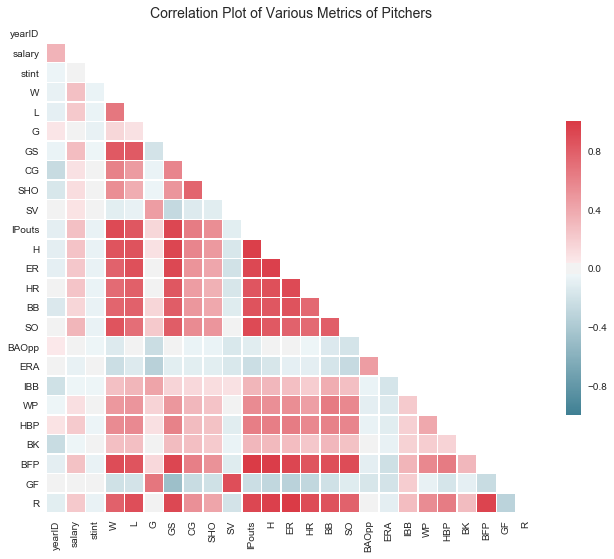

In [31]:
names = list(pitchers)
names.remove('teamID')
names.remove('lgID')
names.remove('playerID')

sns.set(style="white")

# Compute correlation matrix
corr_mat = pitchers.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
plot_corr = sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=1,
            square=True, xticklabels=names, yticklabels=names,
            linewidths=.5, cbar_kws={"shrink": .6}, ax=ax)
plot_corr.set_title('Correlation Plot of Various Metrics of Pitchers', fontsize=14)

plt.show()


In [32]:
pitchers.corr()['salary'].sort_values()

ERA      -0.074914
BK       -0.041556
IBB      -0.040116
stint    -0.028855
GF       -0.025816
G        -0.013964
BAOpp    -0.006465
SV        0.084759
CG        0.088995
WP        0.106267
SHO       0.109498
BB        0.152024
HBP       0.217085
L         0.220500
R         0.225523
ER        0.231290
HR        0.248538
H         0.255421
BFP       0.261633
IPouts    0.268770
W         0.270996
GS        0.285878
SO        0.326296
yearID    0.337580
salary    1.000000
Name: salary, dtype: float64

*yearID* seems to be an interesting feature. Hence, a plot representing the relationship between *yearID* and *salary* is made.

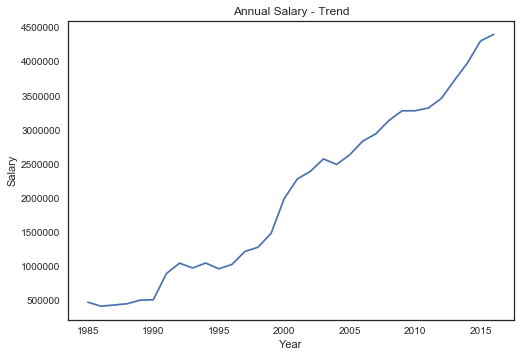

In [33]:
# To see change in salaries over the years
yearly_salary = salary.groupby(['yearID'], as_index=False).mean()
salary_trend_plot = plt.plot(yearly_salary['yearID'], yearly_salary['salary'])
plt.title("Annual Salary - Trend")
plt.xlabel("Year")
plt.ylabel("Salary")
plt.show()

From the relationship obtained above, the *year* and *average salary*, there is a **clear upward trend.** Based on the computed correlation, it can be noted that there is **no significant correlation between the average salaries and the number of wins in a season.** Hence, it can be concluded that spending a lot of money does not play a significant role in the team performance.

Investigating real performance metrics of players, such as ERA and SO.

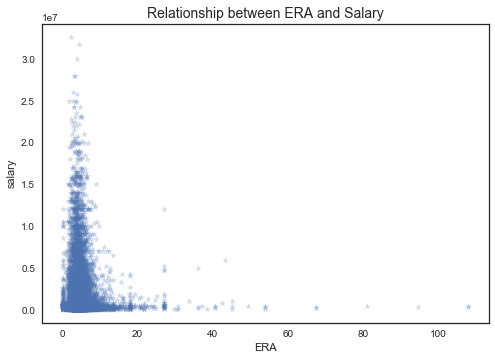

In [34]:
ra_salary_plot = sns.regplot(x=pitchers['ERA'], y=pitchers['salary'],\
                             scatter_kws={'alpha':0.25}, fit_reg=False, marker="*")
ra_salary_plot.set_title('Relationship between ERA and Salary', fontsize=14)
plt.show()

**The above scatterplot of salary and ERA (negative correlation) makes sense, as people normally perceive a pitcher with low ERA a good pichter, and thus deserve higher salary.**

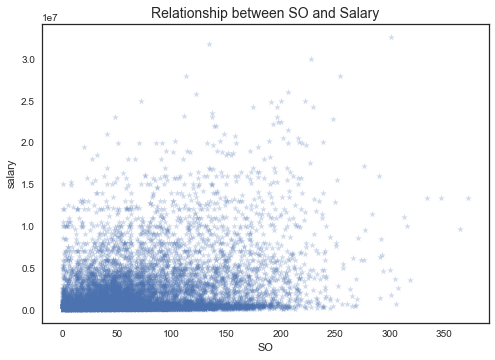

In [35]:
ra_salary_plot = sns.regplot(x=pitchers['SO'], y=pitchers['salary'],\
                             scatter_kws={'alpha':0.25}, fit_reg=False, marker="*")
ra_salary_plot.set_title('Relationship between SO and Salary', fontsize=14)
plt.show()

Finding whether a salary is a factor to win games or not. For this, 3-variable scatter plot is made with *wins, loses & salary*.

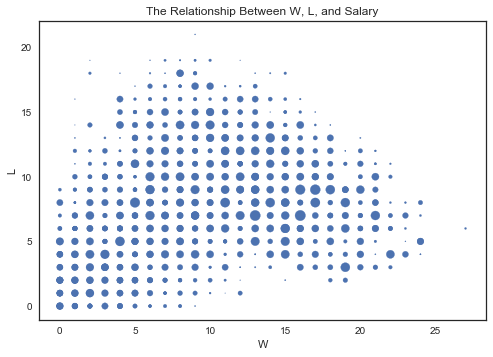

In [36]:
# Plot. Salary is scaled by 300000 for better visualizaion
pitchers.plot.scatter(x= 'W', y='L', s=pitchers['salary']/300000, title = 'The Relationship Between W, L, and Salary')
plt.show()

It seems that the **capability of winning a game is not related to the salary.** On the other hand, the **games lost by a pitcher does not have a clear relationship with salary as well.** *One plausible explanation could be that pitchers who can be responsible for many games would be perceived as a member of contribution.* There are around 160 games a year. Pitchers who can share the workload and maintain win/loss ratio at a certain level might be appreciated.

For this, W/L ratio is calculated for further exploration.

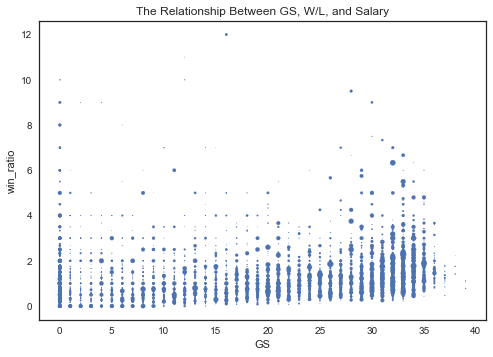

In [37]:
pitchers = pitchers.assign(win_ratio = pitchers.W/ pitchers.L)
pitchers.plot.scatter(x = 'GS', y = 'win_ratio', s=pitchers['salary']/900000, title = 'The Relationship Between GS, W/L, and Salary')
plt.show()

**It looks *win_ratio* still matters.** It can be seen that the bubble size for the points with win_ratio above 2 is relatively more abundant. The salary has a high correlation with *games started (GS)*. The seeming relationship between *L* and *salary* could be *GS*. Even though the players lost games, they can still contribute to the team by sharing the workload, and thus have a high reputation among team management.

The performance metrics such as higher *Strikeouts per game (SO_avg), Ratio of Winning (W_avg), Average Outs Pitched (IPouts_avg), Game Started (GS), and Batters faced by Pitcher (BFP), and lower Earned Run Average (ERA)* are related to high salary. In other words, a pitcher who has a better capability of dominating the game *(reflected by SO_avg, IPouts_avg, W_avg, ERA)* or can be a starter that deals with more batters *(reflecting by GS and BFP)*, tends to earn more.

### Limitations

Several conclusions can be drawn from the various sections of this analysis, but there are also numerous caveats that must be taken care of to prevent these conclusions from being accepted as fact. Since the **analysis only involves correlation testing, it cannot imply causation.** 

Many aspects were not accounted for in the study; they are listed below:
1. **Age factor:** As a player gets older and accumulates more years spent in the league, their salary tends to increase even if their performance does not.
2. **Randomness of statistics:** Some years are better pitching years and some years are better for batters. 
3. **Identification of other key-metrics:** No attempt to identify the most critical stats was made. The baseball-attributes used for solely on the basis of intuition.

### Conclusion

The statistical conclusions are presented at the end of each section.

Overall, this project demonstrated the entire process of investigating a dataset including posing questions about a dataset, wrangling the data into a usable format, analyzing the data, and extracting appropriate conclusions.

There are still multiple possibilities to test the inferences drawn from this analysis which might further strengthen the deductions or provide an alternative conclusion. The field of sabermetrics is fascinating; I wish to further try more analytical techniques to baseball and other sports.